# Le cas du disque
## Trouver des modes à partir de l'équation :
$$\frac{nJ_m'}{J_m}(nkR) = \frac{H_m'}{H_m}(kR)$$

In [4]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.optimize as op
import scipy.special as sp
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D


def func_orig(k, index, r, m) :
    return  np.abs(index*sp.jvp(m, index*(k[0]+k[1]*1j)*r)/sp.jv(m, index*(k[0]+k[1]*1j)*r) - sp.h1vp(m,(k[0]+k[1]*1j)*r)/sp.hankel1(m,(k[0]+k[1]*1j)*r))

def func(k, index, r, m) :
    return  np.abs(index*sp.jvp(m, index*(k[0]+k[1]*1j)*r) * sp.hankel1(m,(k[0]+k[1]*1j)*r)
                   - sp.h1vp(m,(k[0]+k[1]*1j)*r) * sp.jv(m, index*(k[0]+k[1]*1j)*r))


## Méthodologie:
* Visualiser la fonction $f(k) = log(|(nJ_m'H_m - H_m'J_m)|)$
* Utiliser ```Scipy.optimize.minimize``` , ```method='SLSQP'``` avec les bornes correspond aux régions intéressées


## 1. Visualiser la fonction $f(k) = log(|(nJ_m'H_m - H_m'J_m)|)$

<IPython.core.display.Javascript object>


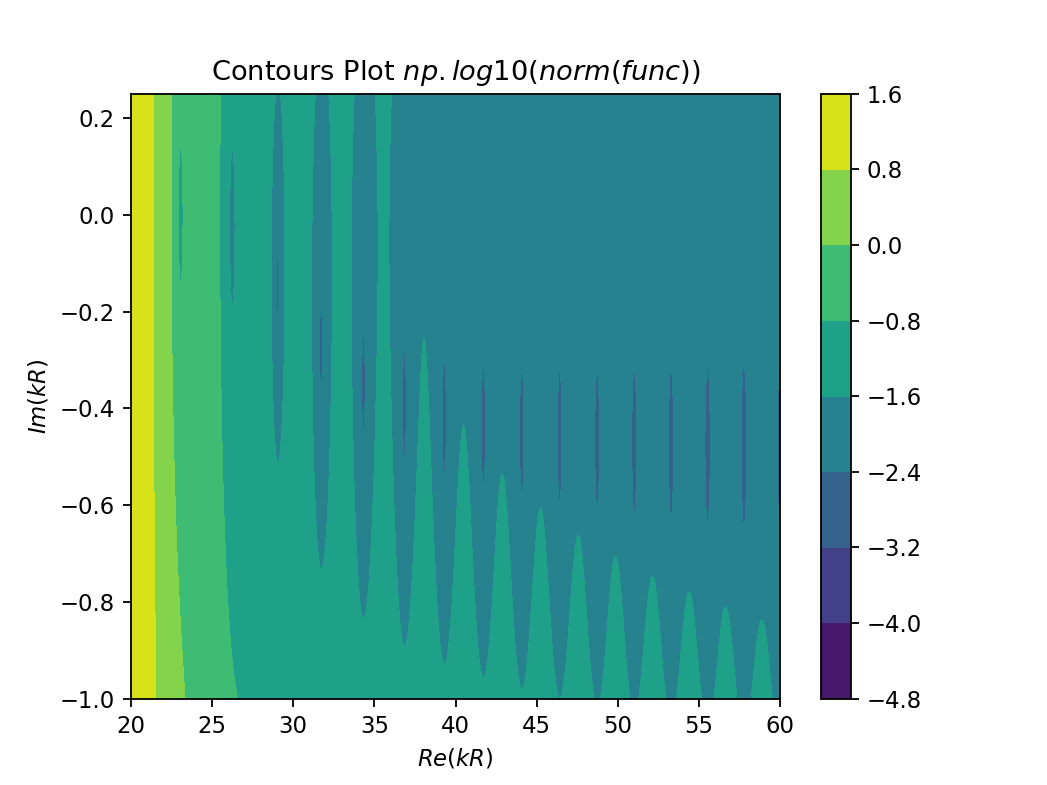

In [3]:
m = 30
u = np.linspace(20, 60, 1000)
v = np.linspace(-1, .25 ,500)
X, Y = np.meshgrid(u, v)

fig = plt.figure(dpi=150)
cp = plt.contourf(X, Y, np.log10(func((X,Y),1.5,1,m)))
fig.colorbar(cp)
plt.title('Contours Plot $np.log10(norm(func))$')
plt.xlabel('$Re(kR)$')
plt.ylabel('$Im(kR)$')
plt.show()
#plt.savefig('log10_norm_func_m30')

## 2. Chercher les racines avec ```Scipy.optimize.minimize```
méthode utilisé : SLSQP avec la tolérence de $10^{-8}$

## cas m = 5

In [5]:
m = 5
# define the region of interest
bounds = [((4, 5.5), (-0.6, 0.1)),
         ((6.5, 7.5), (-0.6, -0.2)),
         ((9, 10), (-0.8, -0.2)),
         ((11, 12), (-1, 0.1))]

res = np.array([op.minimize(func, args=(1.5,1,m), x0 = (2,0), method='SLSQP', bounds=bnd, tol=1e-10, 
                   options={'maxiter':1000, 'disp':True}).x for bnd in bounds])

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2.6158650298012975e-09
            Iterations: 27
            Function evaluations: 138
            Gradient evaluations: 27
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 8.789338294909799e-10
            Iterations: 31
            Function evaluations: 155
            Gradient evaluations: 31
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 6.42563217531337e-10
            Iterations: 28
            Function evaluations: 149
            Gradient evaluations: 28
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1.0845672958827195e-09
            Iterations: 30
            Function evaluations: 146
            Gradient evaluations: 30


In [6]:
roots_m5 = m + np.zeros((res.shape[0], res.shape[1]+1))
roots_m5[:,:-1] = res
roots_m5

array([[ 4.6375229 , -0.29157306,  5.        ],
       [ 7.07670207, -0.46160466,  5.        ],
       [ 9.3589542 , -0.50003302,  5.        ],
       [11.56599178, -0.51439109,  5.        ]])

## cas m = 20

In [7]:
m = 20
# define the region of interest
bounds= [((15.5, 16.5), (-0.1, 0.1)),
        ((18.5, 19.5), (-0.5, 0.2)),
        ((21, 22), (-0.5, 0.2))]


res = np.array([op.minimize(func, args=(1.5,1,m), x0 = (2,0), method='SLSQP', bounds=bnd, tol=1e-10, 
                   options={'maxiter':1000, 'disp':True}).x for bnd in bounds])

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3.1687787880376613e-09
            Iterations: 28
            Function evaluations: 149
            Gradient evaluations: 28
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3.460340816869137e-10
            Iterations: 26
            Function evaluations: 137
            Gradient evaluations: 26
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 5.627837434250797e-10
            Iterations: 32
            Function evaluations: 162
            Gradient evaluations: 32


In [8]:
roots_m20 = m + np.zeros((res.shape[0], res.shape[1]+1))
roots_m20[:,:-1] = res
roots_m20

array([[ 1.58702594e+01, -1.09514305e-02,  2.00000000e+01],
       [ 1.87256711e+01, -1.38100189e-01,  2.00000000e+01],
       [ 2.13918007e+01, -3.00871118e-01,  2.00000000e+01]])

## cas m = 30

In [9]:
m = 30
# define the region of interest
bounds= [((26, 26.5), (-0.5, 0.2)),
        ((28.5, 29.5), (-0.5, 0.2)),
        ((31, 32), (-0.5, 0.2))]


res = np.array([op.minimize(func, args=(1.5,1,m), x0 = (2,0), method='SLSQP', bounds=bnd, tol=1e-10, 
                   options={'maxiter':1000, 'disp':True}).x for bnd in bounds])

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1.407530779791475e-09
            Iterations: 25
            Function evaluations: 126
            Gradient evaluations: 25
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 4.276772120219055e-10
            Iterations: 29
            Function evaluations: 140
            Gradient evaluations: 29
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3.186217641261785e-10
            Iterations: 30
            Function evaluations: 158
            Gradient evaluations: 30


In [10]:
roots_m30 = m + np.zeros((res.shape[0], res.shape[1]+1))
roots_m30[:,:-1] = res
roots_m30

array([[ 2.62350010e+01, -2.63945865e-02,  3.00000000e+01],
       [ 2.90259722e+01, -1.46407249e-01,  3.00000000e+01],
       [ 3.17178655e+01, -2.75087315e-01,  3.00000000e+01]])

## cas m = 40

In [11]:
m = 40
# define the region of interest
bounds= [((33, 34), (-0.5, 0.2)),
        ((36, 37), (-0.5, 0.2)),
        ((39, 40), (-0.5, 0.2))]


res = np.array([op.minimize(func, args=(1.5,1,m), x0 = (2,0), method='SLSQP', bounds=bnd, tol=1e-10, 
                   options={'maxiter':1000, 'disp':True}).x for bnd in bounds])

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 8.264378537839116e-10
            Iterations: 29
            Function evaluations: 148
            Gradient evaluations: 29
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 7.558838614927139e-10
            Iterations: 27
            Function evaluations: 144
            Gradient evaluations: 27
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3.3656158489952e-10
            Iterations: 24
            Function evaluations: 128
            Gradient evaluations: 24


In [12]:
roots_m40 = m + np.zeros((res.shape[0], res.shape[1]+1))
roots_m40[:,:-1] = res
roots_m40

array([[ 3.35888992e+01, -2.57197125e-03,  4.00000000e+01],
       [ 3.65632949e+01, -4.08634187e-02,  4.00000000e+01],
       [ 3.93375920e+01, -1.51596244e-01,  4.00000000e+01]])

In [13]:
roots = np.vstack((roots_m5, roots_m20, roots_m30, roots_m40))

In [69]:
#np.savetxt('modes_roots_m_5_20_30_40', X=roots, header='freq  imag  m')

# Comparaison avec la donnée de Stefan

In [22]:
data = np.loadtxt('/home/hong/Desktop/Microlaser1/Disque/donnees_stefan/KOQ2 m=0-61 n=1.500 TM.txt',skiprows=2)

<IPython.core.display.Javascript object>


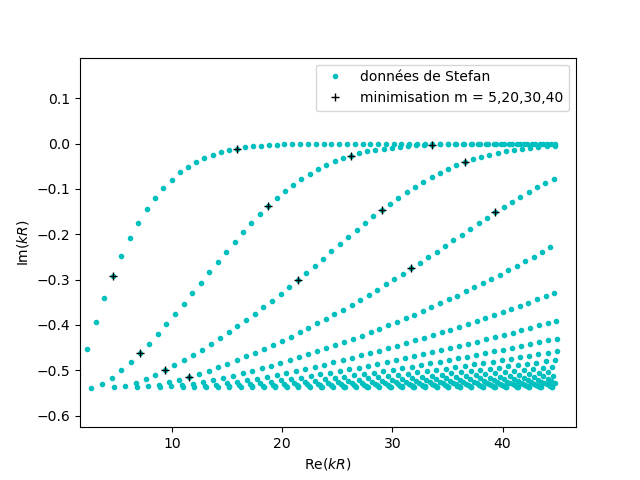

In [26]:
plt.figure()
plt.plot(data[:,0],data[:,1],'c.', label='données de Stefan')
plt.plot(roots[:,0],roots[:,1],'k+', label='minimisation m = 5,20,30,40')
plt.xlabel('Re($kR$)')
plt.ylabel('Im($kR$)')
plt.legend()
plt.show()

In [42]:
data[(data[:,2] == 30)]

array([[ 2.3048605e+01, -5.2662050e-04,  3.0000000e+01],
       [ 2.6235001e+01, -2.6394580e-02,  3.0000000e+01],
       [ 2.9025972e+01, -1.4640720e-01,  3.0000000e+01],
       [ 3.1717866e+01, -2.7508730e-01,  3.0000000e+01],
       [ 3.4324205e+01, -3.5250240e-01,  3.0000000e+01],
       [ 3.6847667e+01, -3.9788010e-01,  3.0000000e+01],
       [ 3.9305266e+01, -4.2678010e-01,  3.0000000e+01],
       [ 4.1711835e+01, -4.4658630e-01,  3.0000000e+01],
       [ 4.4078280e+01, -4.6092650e-01,  3.0000000e+01]])